In [73]:
# Importação de Bibliotecas e Leitura Arquivo CSV
import pandas as pd
df = pd.read_csv('Producao.csv',sep=';')

In [ ]:
# Tratamento dos dados lidos: Primeira linha do CSV tem histórico de um Produto; Transposição dos dados
df = df2 = df.iloc[[0]]  # Pega a primeira linha como DataFrame
df3 = df2.T # Transpõe (anos viram índice, produto vira coluna)
df3 = df3.reset_index()
df3.columns = ['Ano','Quantidade (L)']
df4 = df3.iloc[2:]
produto = df.iloc[0, 1] # Vinho de Mesa
print(produto)
df5 = df4.iloc[1:]
df5 = df5[df5['Ano'].astype(int) % 3 == 0] # Intervalo de 3 anos (melhorar exibição)
df5

VINHO DE MESA


,Ano,Quantidade (L)
4,1971,154264651
7,1974,193875345
10,1977,195359778
13,1980,130308185
16,1983,120261544
19,1986,157711522
22,1989,181801961
25,1992,163248419
28,1995,214788304
31,1998,150814943


In [ ]:
# Importação de Bibliotecas de ML e Previsão com Linear Regression
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Preparação dos dados para o modelo ML
X = df5['Ano'].values.reshape(-1, 1)           # variável independente (Ano)
y = df5['Quantidade (L)'].values

In [74]:
# Criar e ajustar o modelo
model = LinearRegression()
model.fit(X, y)

# Prever para os próximos anos, por exemplo 2024 a 2031
anos_futuros = np.arange(2024, 2031).reshape(-1, 1)
previsoes = model.predict(anos_futuros)

In [75]:
# Mostrar resultados
for ano, pred in zip(anos_futuros.flatten(), previsoes):
    print(f'Ano {ano}: previsão {int(pred)} litros')

Ano 2024: previsão 198035280 litros
Ano 2025: previsão 198572381 litros
Ano 2026: previsão 199109483 litros
Ano 2027: previsão 199646584 litros
Ano 2028: previsão 200183685 litros
Ano 2029: previsão 200720787 litros
Ano 2030: previsão 201257888 litros


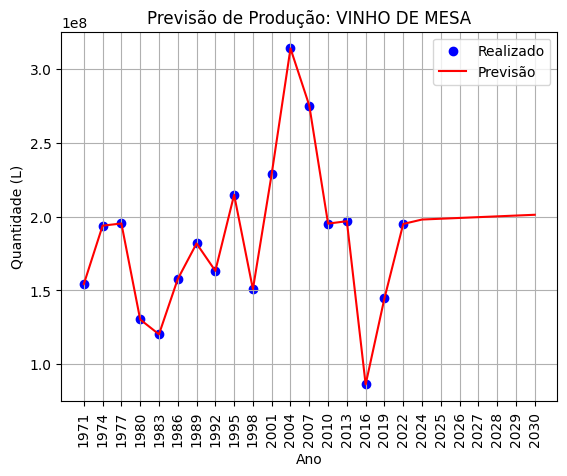

In [78]:
import matplotlib.pyplot as plt

# Plot dos dados históricos
plt.scatter(df5['Ano'], df5['Quantidade (L)'], color='blue', label='Realizado')

# Plot da linha de regressão (tanto dados históricos quanto previsões)
import numpy as np
X_all = np.concatenate((df5['Ano'].values.astype(str), anos_futuros.flatten()))
y_all = np.concatenate((df5['Quantidade (L)'].values, previsoes))

# Ordena os valores para o gráfico ficar certinho
# sorted_indices = np.argsort(X_all)
#X_all_sorted = X_all[sorted_indices]
#y_all_sorted = y_all[sorted_indices]

plt.plot(X_all, y_all, color='red', label='Previsão')

plt.xlabel('Ano')
plt.ylabel('Quantidade (L)')
plt.xticks(rotation=90)
plt.title('Previsão de Produção: '+produto)
plt.legend()
plt.grid(True)
plt.show()